In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [25]:
full_df = pd.read_csv("full_df_1990_2024.csv", index_col="Date")

In [26]:
full_df.tail()

,USA_Index_Total,USA_Index_SMA(36),USA_Index_SMA(12),USA_Bonds_10Y2Y,interest_rates_USA,S&P500_change_stat_mean,MSCI_World_change_stat_mean,Dollar_Price_in_Yen_scaled_mean,VIX_Index_Price_Scaled,USA_Index_PCA,Japan_Index_Total,Japan_Index_SMA(36),Japan_Index_SMA(12),Nikkei_225_change_stat_mean,Japan_Index_PCA
Date,,,,,,,,,,,,,,,
2024-06-01,-3.0,-2.305556,-3.083333,-0.433500,5.33,0.411533,0.339677,7.896325,0.155847,4.098481,-2.0,-1.944444,-1.666667,0.367197,3.824580
2024-07-01,-3.0,-2.333333,-3.083333,-0.251739,5.33,0.372143,0.306553,7.880957,0.173524,4.381798,-3.0,-2.027778,-1.666667,0.347884,3.400484
2024-08-01,-2.0,-2.361111,-3.000000,-0.094545,5.33,0.449098,0.402071,7.306841,0.232083,3.818955,-3.0,-2.083333,-1.833333,0.386455,3.358663
2024-09-01,-3.0,-2.416667,-2.916667,0.094286,5.13,0.588308,0.525918,7.157952,0.215527,4.329018,-1.0,-2.111111,-1.833333,0.401962,3.362715
2024-10-01,-2.0,-2.444444,-2.916667,0.121304,4.83,0.611756,0.544906,7.495891,0.240684,4.087321,-2.0,-2.166667,-1.833333,0.516002,3.585621


Text(0.5, 1.0, 'pearson')

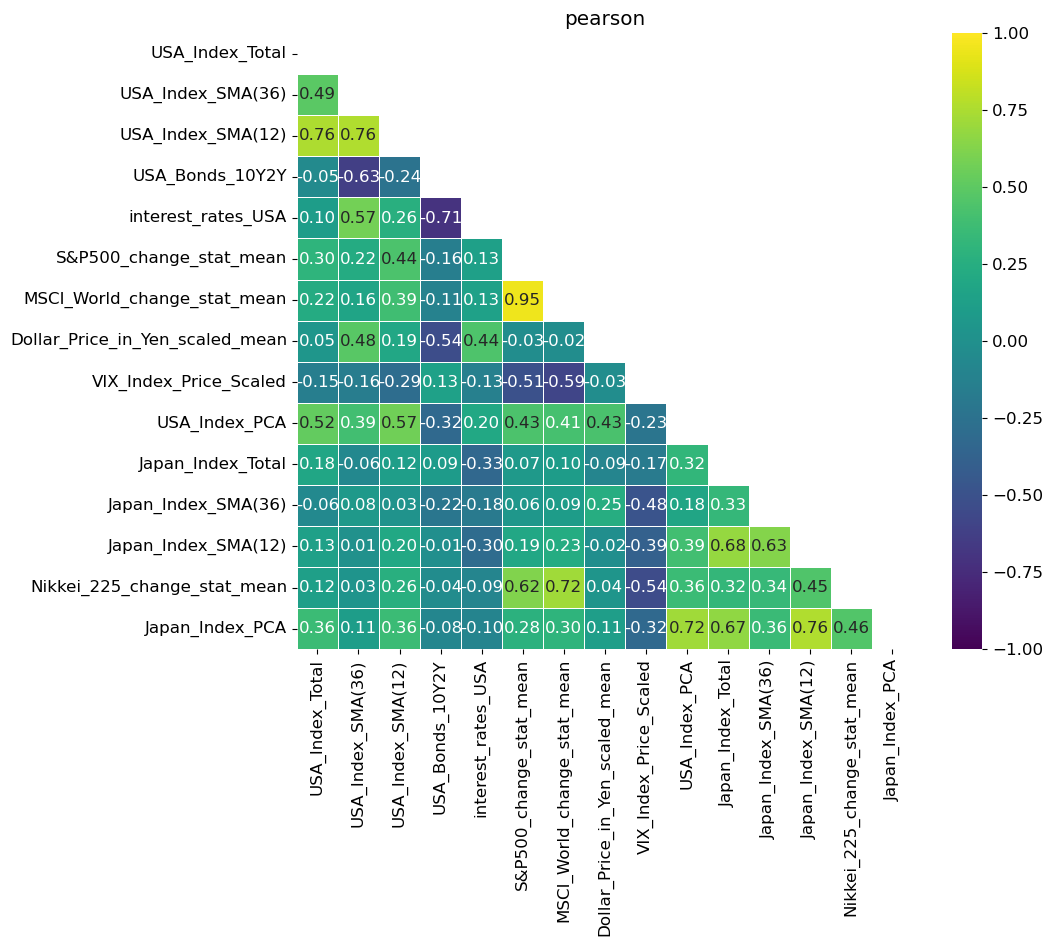

In [27]:
mask = np.triu(np.ones_like(full_df[36:].corr(), dtype=bool))


plt.figure(figsize = (10,8))
plt.rcParams.update({'font.size': 12})
sns.heatmap(full_df[36:].corr("pearson"), cmap = 'viridis', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5, mask= mask)
plt.title("pearson")

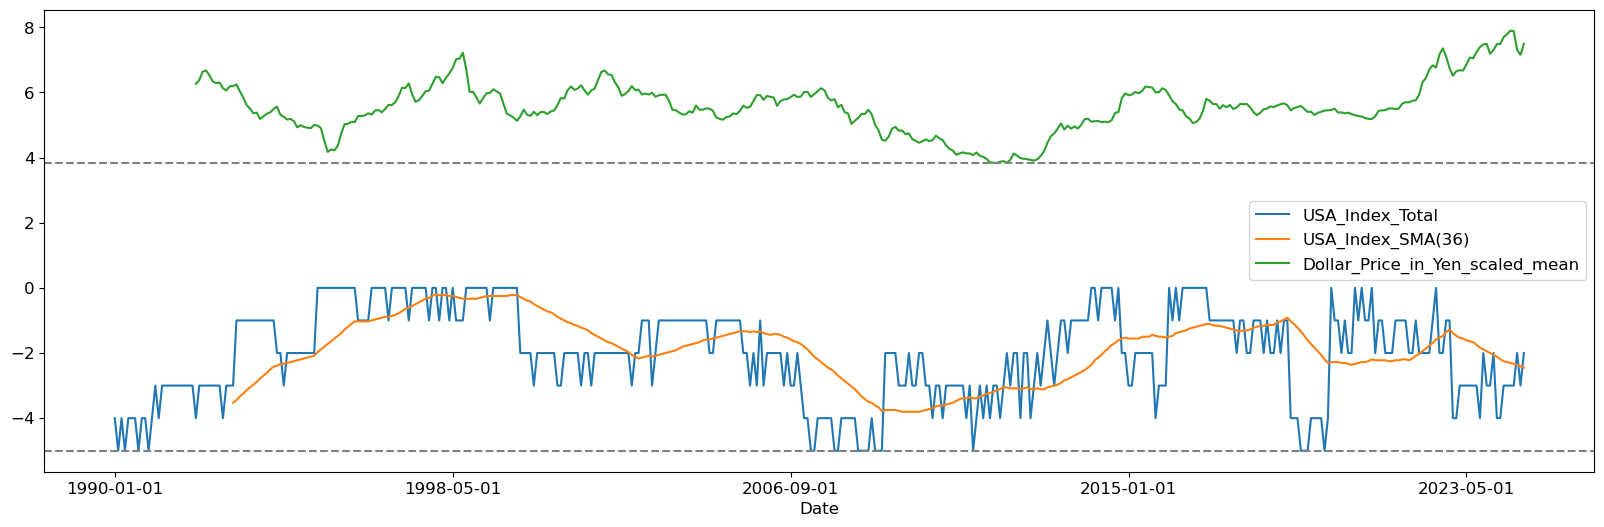

In [28]:
full_df[["USA_Index_Total", 'USA_Index_SMA(36)', 'Dollar_Price_in_Yen_scaled_mean']].plot(figsize=(20,6))
plt.axhline(y=full_df["Dollar_Price_in_Yen_scaled_mean"].min(), color="grey", linestyle="--")
plt.axhline(y=full_df["USA_Index_Total"].min(), color="grey", linestyle="--")

In [29]:
with_what = "USA_Index_SMA(36)"
what = "USA_Bonds_10Y2Y"
X = full_df[36:][with_what]
y = full_df[36:][what]
train_size = 0.6

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
lr = LinearRegression()

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)


In [32]:
X_train.values.reshape(-1,1)

array([[-1.41666667],
       [-1.30555556],
       [-0.55555556],
       [-3.55555556],
       [-1.38888889],
       [-1.72222222],
       [-0.72222222],
       [-0.33333333],
       [-2.11111111],
       [-0.94444444],
       [-1.5       ],
       [-1.13888889],
       [-1.        ],
       [-3.22222222],
       [-0.33333333],
       [-2.08333333],
       [-1.02777778],
       [-1.47222222],
       [-2.08333333],
       [-0.33333333],
       [-2.19444444],
       [-1.47222222],
       [-2.27777778],
       [-1.19444444],
       [-1.30555556],
       [-2.05555556],
       [-1.41666667],
       [-1.55555556],
       [-0.38888889],
       [-2.05555556],
       [-3.75      ],
       [-2.19444444],
       [-2.27777778],
       [-1.11111111],
       [-3.11111111],
       [-1.61111111],
       [-0.97222222],
       [-3.80555556],
       [-1.02777778],
       [-1.94444444],
       [-1.02777778],
       [-2.41666667],
       [-1.55555556],
       [-3.33333333],
       [-3.61111111],
       [-1

229


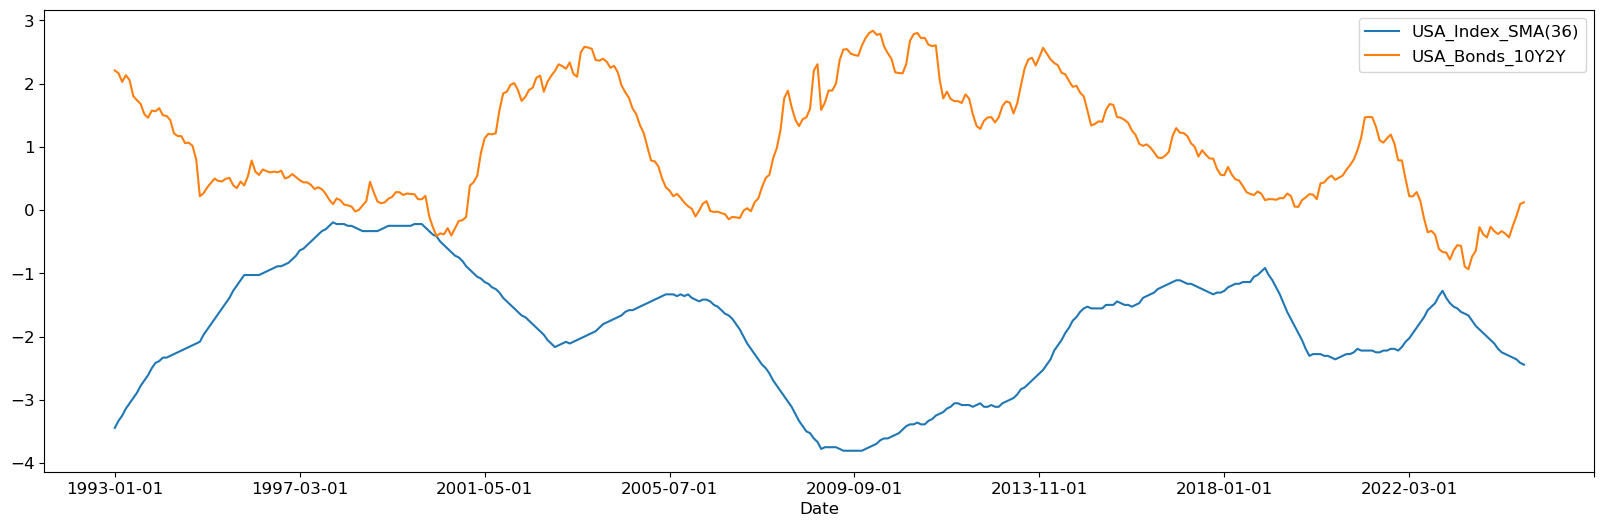

In [33]:
X.plot(figsize=(20,6))
mark = int(len(y)*train_size)
print(mark)
y.plot(figsize=(20,6))
plt.legend([with_what, what])

In [34]:
X[mark:]

Date
2012-02-01   -3.083333
2012-03-01   -3.083333
2012-04-01   -3.083333
2012-05-01   -3.111111
2012-06-01   -3.083333
                ...   
2024-06-01   -2.305556
2024-07-01   -2.333333
2024-08-01   -2.361111
2024-09-01   -2.416667
2024-10-01   -2.444444
Name: USA_Index_SMA(36), Length: 153, dtype: float64

In [35]:
lr.fit(X[:mark].values.reshape(-1,1), y[:mark].values.reshape(-1,1))
predictions = lr.predict(X[mark:].values.reshape(-1,1))

<Axes: >

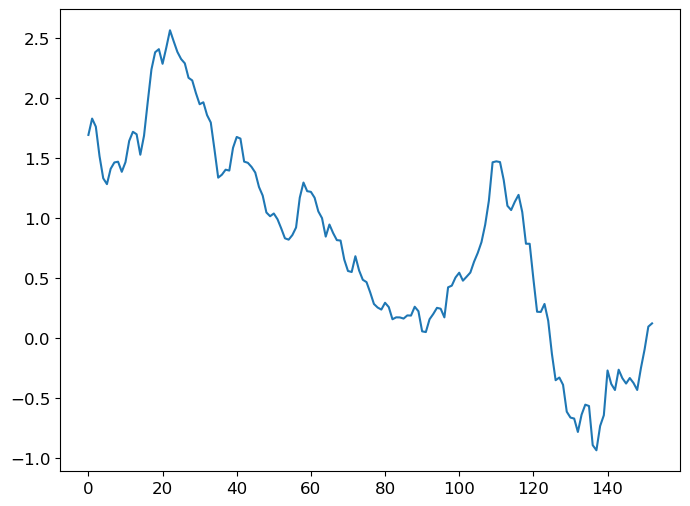

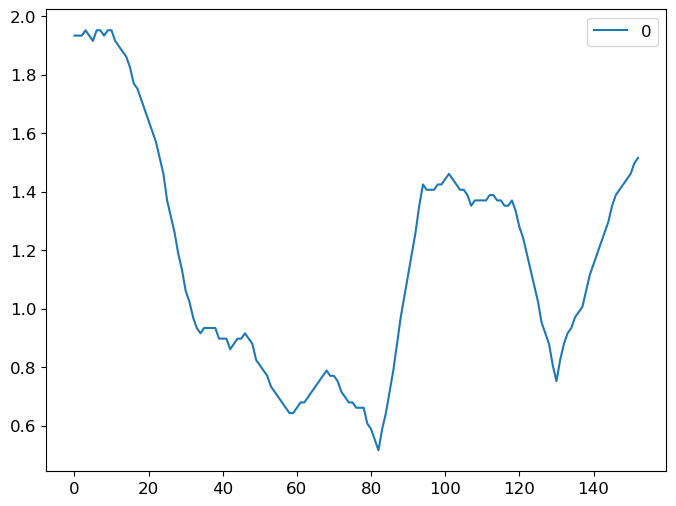

In [36]:
y[mark:].reset_index(drop=True).plot(figsize=(8,6))
pd.DataFrame(predictions).plot(figsize=(8,6))


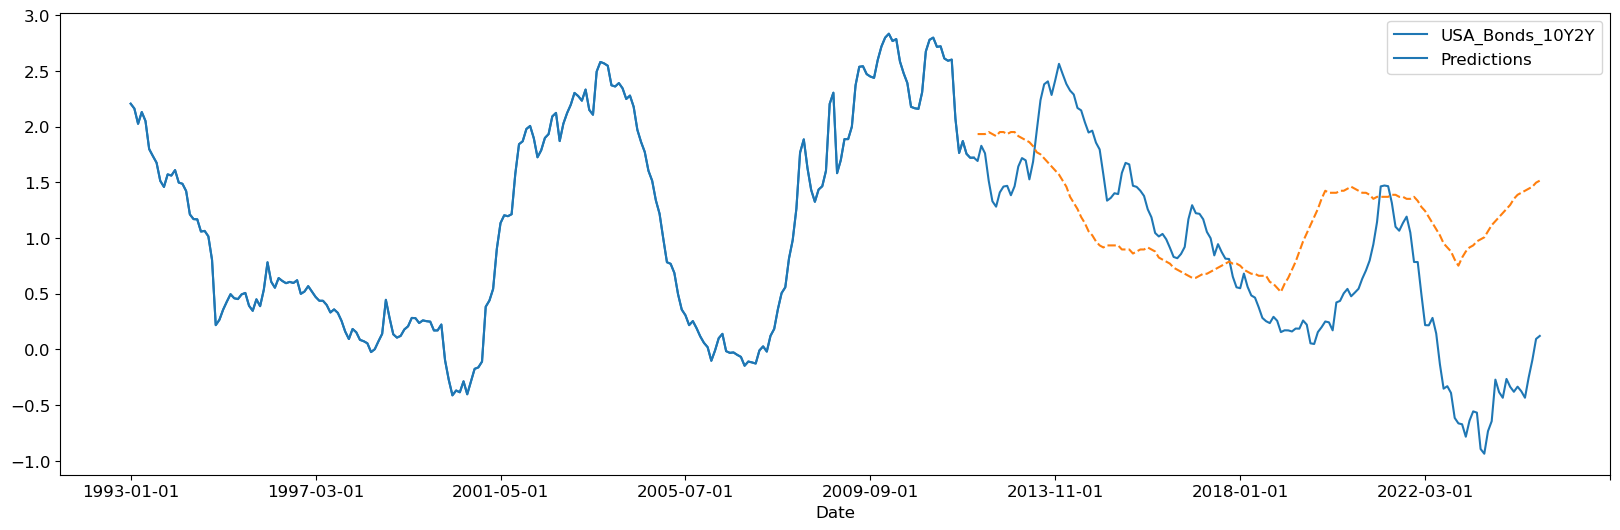

In [37]:
#   plotting results

predictions_df = pd.DataFrame(lr.predict(X[mark:].values.reshape(-1,1)), index=y[mark:].index)
full_pred_plot = pd.concat([y[:mark], pd.DataFrame(predictions_df)])
full_pred_plot

y.plot(figsize=(20,6))

#sns.lineplot(y[:mark])
sns.lineplot(full_pred_plot)
plt.legend(["USA_Bonds_10Y2Y", "Predictions"])


In [38]:
#   another pred from another SMA

R2 score:  -8.152282127699719


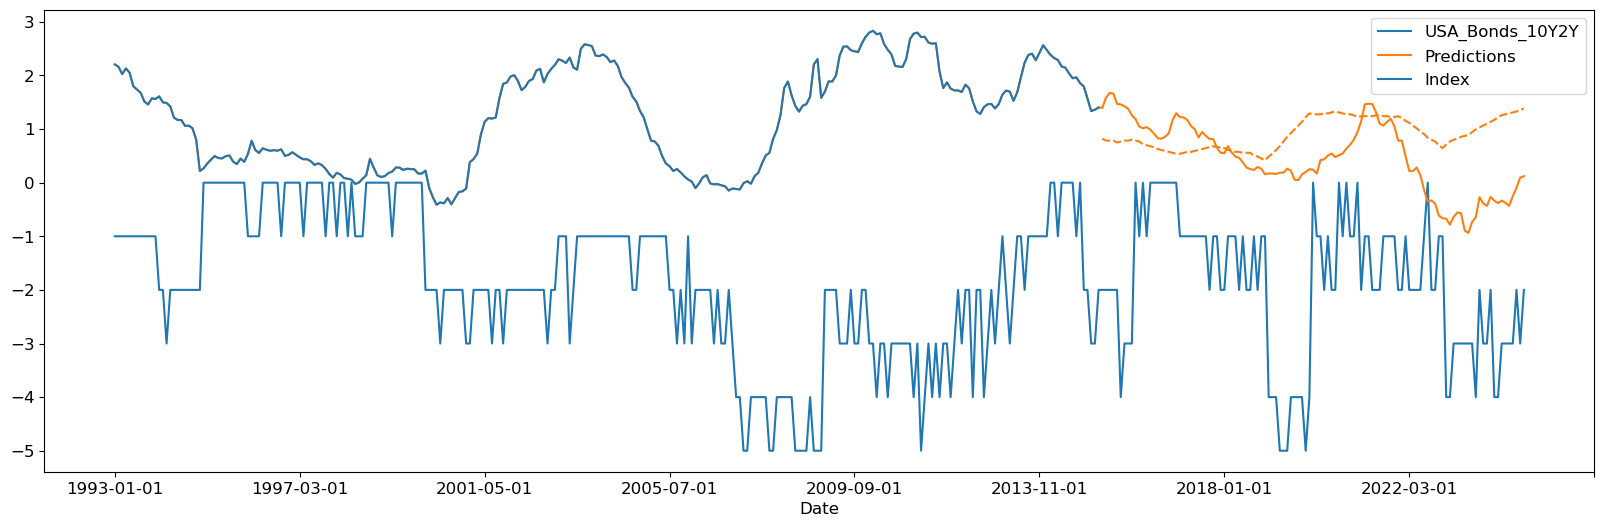

In [39]:
#   Interactives

with_what = "USA_Index_SMA(36)"
what = "USA_Bonds_10Y2Y"
train_size = 0.7
models = [LinearRegression(n_jobs=0), Lasso(alpha=0), Ridge(alpha=1)]

lr = models[0]

X = full_df[36:][with_what]
y = full_df[36:][what]


#   Code



X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)
X_train.values.reshape(-1,1)

full_df["USA_Index_Total"][36:].plot(figsize=(20,6))
mark = int(len(y)*train_size)

lr.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))
predictions = lr.predict(X[mark:].values.reshape(-1,1))

predictions_df = pd.DataFrame(lr.predict(X[mark:].values.reshape(-1,1)), index=y[mark:].index)
full_pred_plot = pd.concat([y[:mark], pd.DataFrame(predictions_df)])
full_pred_plot

y.plot(figsize=(20,6))

#sns.lineplot(y[:mark])
sns.lineplot(full_pred_plot)
plt.legend(["USA_Bonds_10Y2Y", "Predictions", "Index"])

print("R2 score: ", r2_score(predictions, y[mark:]))


In [40]:
#   Hyperparams

In [41]:
from sklearn.model_selection import RandomizedSearchCV 

param_dist = {'alpha': [0,1, 1,0, 10,0, 100,0]} 
lasso = Lasso() 
random_search = RandomizedSearchCV(lasso, param_dist, n_iter=10, cv=5) 
random_search.fit(X_train.values.reshape(-1,1), y_train)

c:\Users\V. Stasiunaitis\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\V. Stasiunaitis\anaconda3\Lib\site-packages\sklearn\base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\V. Stasiunaitis\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\V. Stasiunaitis\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing r

RandomizedSearchCV(cv=5, estimator=Lasso(),
                   param_distributions={'alpha': [0, 1, 1, 0, 10, 0, 100, 0]})

In [42]:
print(random_search.best_params_)
random_search.best_score_

{'alpha': 0}


0.38922654111073846

In [43]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0,1, 1,0, 10,0, 100,0]} 
ridge = Ridge() 
grid_search = GridSearchCV(ridge, param_grid, cv=5) 
grid_search.fit(X_train.values.reshape(-1,1), y_train)
print(grid_search.best_params_)
grid_search.best_score_

{'alpha': 1}


0.38927765564618594

In [44]:
params = {'copy_X': [True, False],
          'fit_intercept': [True,False], 
          'n_jobs': [1,5,10,15,None], 
          'positive': [True,False]}

lr = LinearRegression()
random_search = RandomizedSearchCV(lr, params, n_iter=100, cv=5)
random_search.fit(X_train.values.reshape(-1,1), y_train)
print(random_search.best_params_)
random_search.best_score_

c:\Users\V. Stasiunaitis\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 40 is smaller than n_iter=100. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'positive': False, 'n_jobs': 1, 'fit_intercept': True, 'copy_X': True}


0.38922654111073846

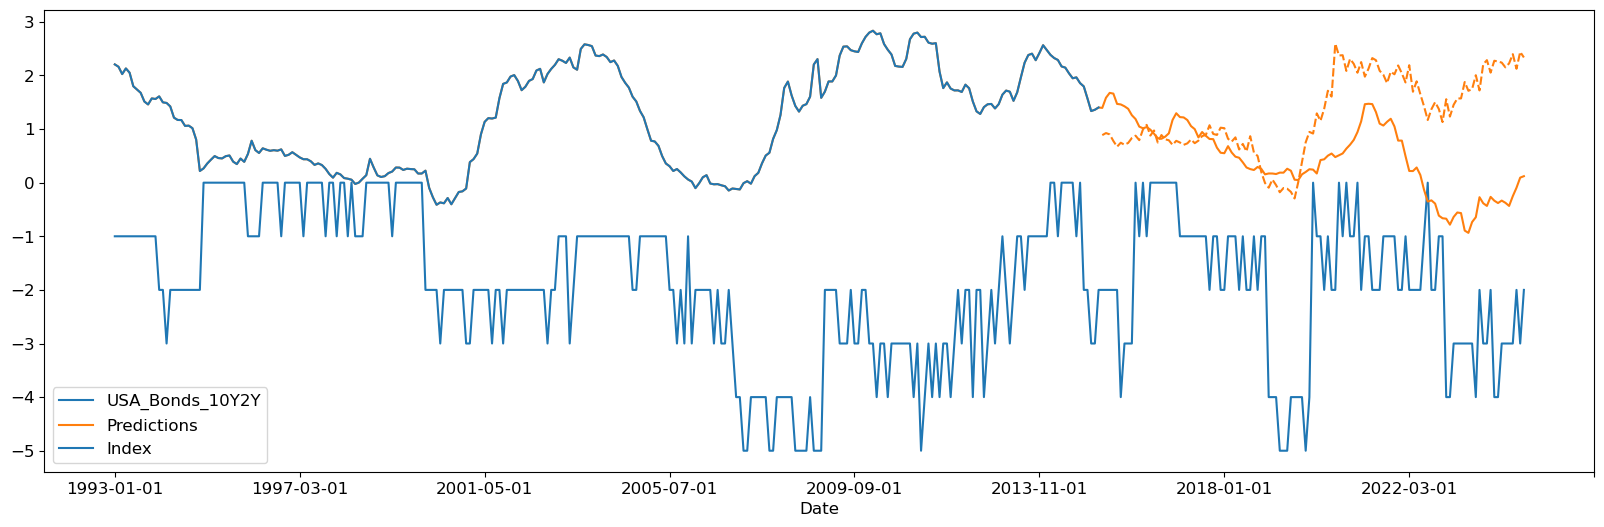

In [45]:
#   Interactives

with_what = ["USA_Index_SMA(36)", "USA_Index_PCA"]
what = "USA_Bonds_10Y2Y"
train_size = 0.7
models = [LinearRegression(), Lasso(alpha=0), Ridge()]

lr = models[0]

X = full_df[36:][with_what]
y = full_df[36:][what]


#   Code



X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)
X_train.values.reshape(-1,1)

full_df["USA_Index_Total"][36:].plot(figsize=(20,6))
mark = int(len(y)*train_size)

lr.fit(X[:mark].values.reshape(-1,2), y[:mark].values.reshape(-1,1))
predictions = lr.predict(X[mark:].values.reshape(-1,2))

predictions_df = pd.DataFrame(lr.predict(X[mark:].values.reshape(-1,2)), index=y[mark:].index)
full_pred_plot = pd.concat([y[:mark], pd.DataFrame(predictions_df)])
full_pred_plot

y.plot(figsize=(20,6))

#sns.lineplot(y[:mark])
sns.lineplot(full_pred_plot)
plt.legend(["USA_Bonds_10Y2Y", "Predictions", "Index"])


In [46]:
full_df.columns

Index(['USA_Index_Total', 'USA_Index_SMA(36)', 'USA_Index_SMA(12)',
       'USA_Bonds_10Y2Y', 'interest_rates_USA', 'S&P500_change_stat_mean',
       'MSCI_World_change_stat_mean', 'Dollar_Price_in_Yen_scaled_mean',
       'VIX_Index_Price_Scaled', 'USA_Index_PCA', 'Japan_Index_Total',
       'Japan_Index_SMA(36)', 'Japan_Index_SMA(12)',
       'Nikkei_225_change_stat_mean', 'Japan_Index_PCA'],
      dtype='object')

R2 score:  -22.941219398415498


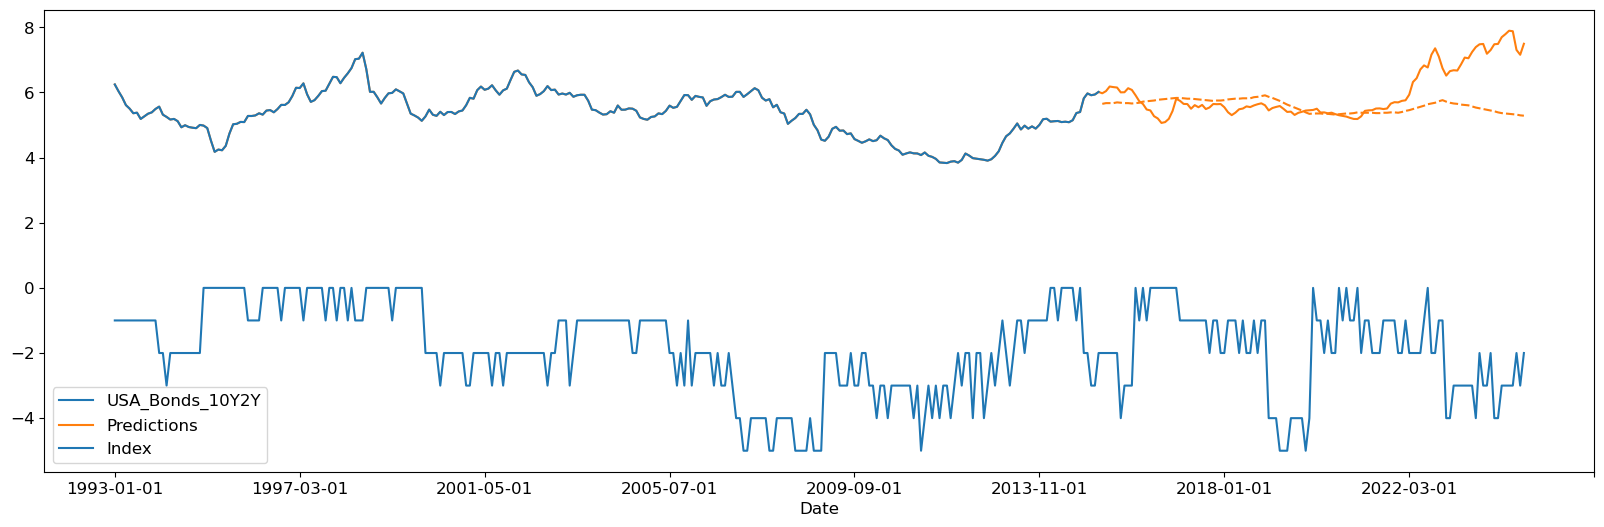

In [47]:
#   Interactives

with_what = "USA_Index_SMA(36)"
what = "Dollar_Price_in_Yen_scaled_mean"
train_size = 0.7
models = [LinearRegression(n_jobs=0), Lasso(alpha=0), Ridge(alpha=1)]

lr = models[0]

X = full_df[36:][with_what]
y = full_df[36:][what]


#   Code


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)
X_train.values.reshape(-1,1)

full_df["USA_Index_Total"][36:].plot(figsize=(20,6))
mark = int(len(y)*train_size)

lr.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))
predictions = lr.predict(X[mark:].values.reshape(-1,1))

predictions_df = pd.DataFrame(lr.predict(X[mark:].values.reshape(-1,1)), index=y[mark:].index)
full_pred_plot = pd.concat([y[:mark], pd.DataFrame(predictions_df)])
full_pred_plot

y.plot(figsize=(20,6))

#sns.lineplot(y[:mark])
sns.lineplot(full_pred_plot)
plt.legend(["USA_Bonds_10Y2Y", "Predictions", "Index"])

print("R2 score: ", r2_score(predictions, y[mark:]))


<Axes: xlabel='Date'>

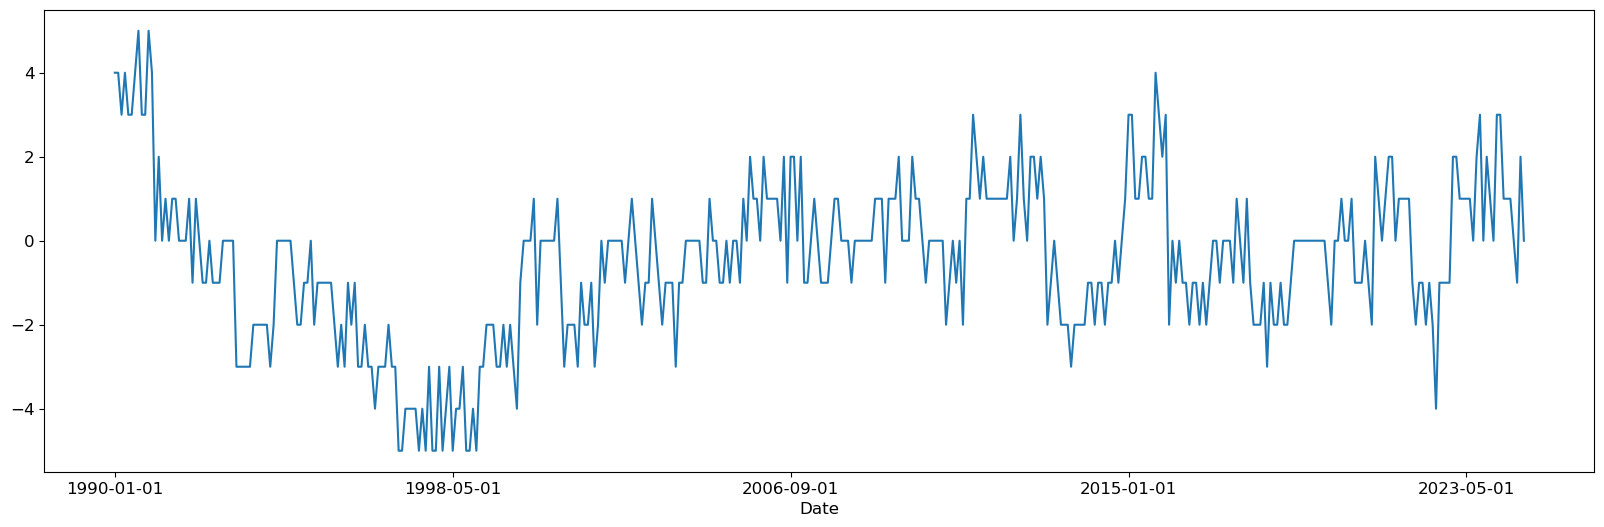

In [52]:
#full_df["Japan_Index_Total"].plot(figsize=(20,4))
(full_df["Japan_Index_Total"] - full_df["USA_Index_Total"]).plot(figsize=(20,6))

<Axes: xlabel='Date'>

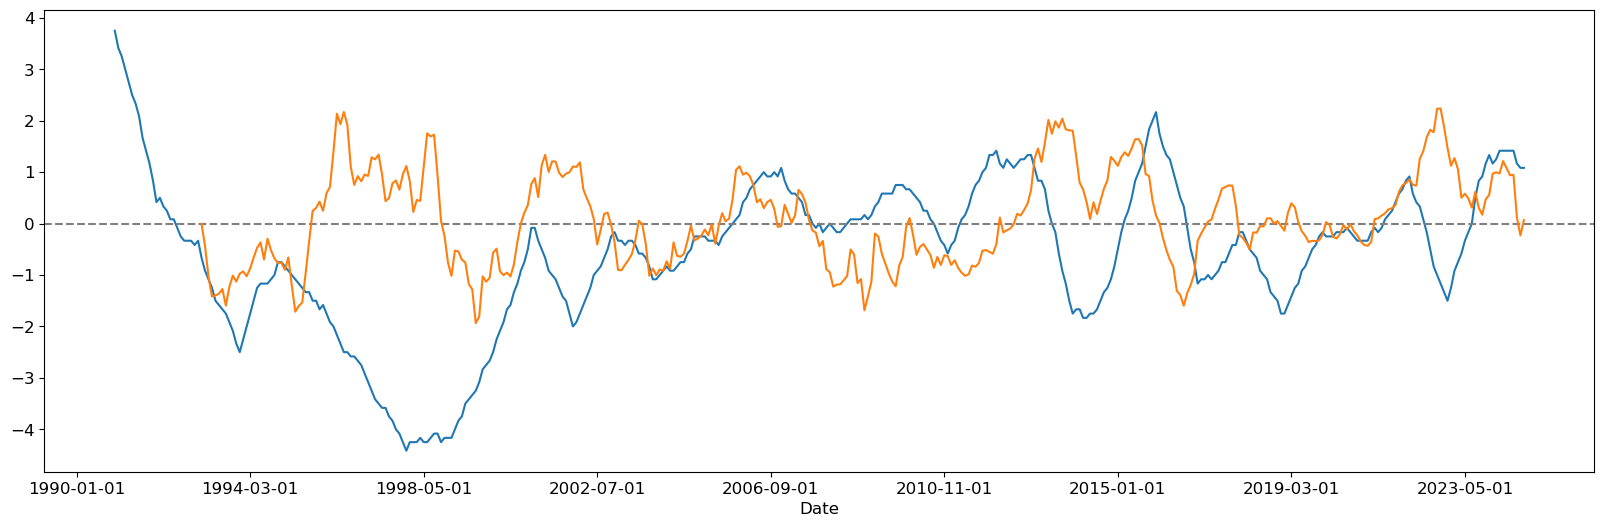

In [49]:
(full_df["Japan_Index_Total"] - full_df["USA_Index_Total"]).rolling(window=12).mean().plot(figsize=(20,6))
plt.axhline(y=0, color="grey", linestyle="--")
full_df["Dollar_Price_in_Yen_scaled_mean"].pct_change().rolling(window=12).mean().apply(lambda x:x*100).plot(figsize=(20,6))

In [50]:
difference = (full_df["Japan_Index_Total"] - full_df["USA_Index_Total"]).rolling(window=2).mean()
yen_volatility = full_df["Dollar_Price_in_Yen_scaled_mean"].pct_change().rolling(window=12).mean().apply(lambda x:x*100)

In [51]:
pd.concat([difference, yen_volatility], axis=1).corr()

,0,Dollar_Price_in_Yen_scaled_mean
0,1.000000,-0.085513
Dollar_Price_in_Yen_scaled_mean,-0.085513,1.000000
